# Diabetics Prediction 

In [34]:
#Import all the required libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier,LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## DATA Overview and DATA Cleaning

In [3]:

dataset=pd.read_csv('diabetes_dataset.csv')  
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
dataset.duplicated().sum()

0

In [9]:
# values of some columns cannot be zero and its not accepted...so replace
#columns like bloodpressure, skin thickness etc

zero_not_accepted=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

In [10]:
for column in zero_not_accepted:
    dataset[column]=dataset[column].replace(0,np.NaN)    
    #Now we need to fill the spaces of nan...........so using mean replacement
    mean=int(dataset[column].mean(skipna=True)) 
    dataset[column]=dataset[column].replace(np.NaN, mean)
    

In [11]:
print(dataset['Glucose'])# we won't see the missing data

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [12]:
#Seperating the data into labels and class
x=dataset.iloc[:,:8]   
y=dataset.iloc[:,8]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

In [13]:
#keeps it b/w -1 to 1

sc_x=StandardScaler()   #importing
x_train=sc_x.fit_transform(x_train)  #training xtrain and test
x_test=sc_x.transform(x_test)


### Applying KNN

In [14]:
for i in range(3,30,2):
    clf=KNeighborsClassifier(n_neighbors=i)  #define the model
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=round(accuracy_score(y_test,y_pred),2)
    
    print("FOR k={}, we have a score {}".format(i,accuracy))

    

FOR k=3, we have a score 0.74
FOR k=5, we have a score 0.75
FOR k=7, we have a score 0.75
FOR k=9, we have a score 0.75
FOR k=11, we have a score 0.74
FOR k=13, we have a score 0.75
FOR k=15, we have a score 0.77
FOR k=17, we have a score 0.75
FOR k=19, we have a score 0.75
FOR k=21, we have a score 0.75
FOR k=23, we have a score 0.77
FOR k=25, we have a score 0.76
FOR k=27, we have a score 0.75
FOR k=29, we have a score 0.76


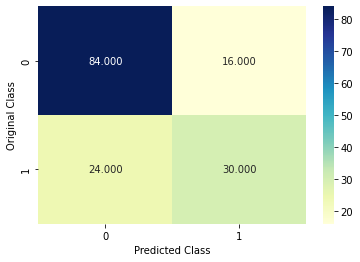

In [31]:
#K=11 has the highest accuracy
clf=KNeighborsClassifier(n_neighbors=11)  #define the model
clf.fit(x_train, y_train)  #fit the model
y_pred=clf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
labels=[0,1]
sns.heatmap(cm,annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [32]:
print("Accuracy with KNN:-",accuracy_score(y_test,y_pred))
print("F1 Score with KNN:-",f1_score(y_test,y_pred))


Accuracy with KNN:- 0.7402597402597403
F1 Score with KNN:- 0.6


In [33]:
#checking
clf.predict_proba([[6,148.0,72.0,35.0,94.0,33.6,0.627,50]])

array([[0.18181818, 0.81818182]])

### Logistic Regression

In [34]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

clf2=GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)  #define the model
clf2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}], scoring='f1')

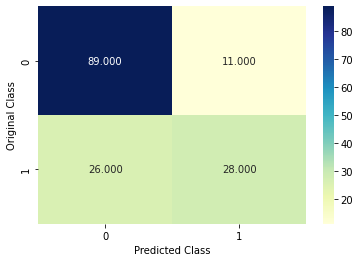

In [35]:
y_pred=clf2.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
labels=[0,1]
sns.heatmap(cm,annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [36]:
print("Accuracy with LR:-",accuracy_score(y_test,y_pred))
print("F1 Score with LR:-",f1_score(y_test,y_pred))

Accuracy with LR:- 0.7597402597402597
F1 Score with LR:- 0.6021505376344085
